Enter your initial budget: 1000
Enter the number of vendors: 3
Enter the vendor category 1 (decor, bakery, catering, music): decor
Enter the vendor price 1: 400
Enter the vendor category 2 (decor, bakery, catering, music): bakery
Enter the vendor price 2: 500
Enter the vendor category 3 (decor, bakery, catering, music): music
Enter the vendor price 3: 200


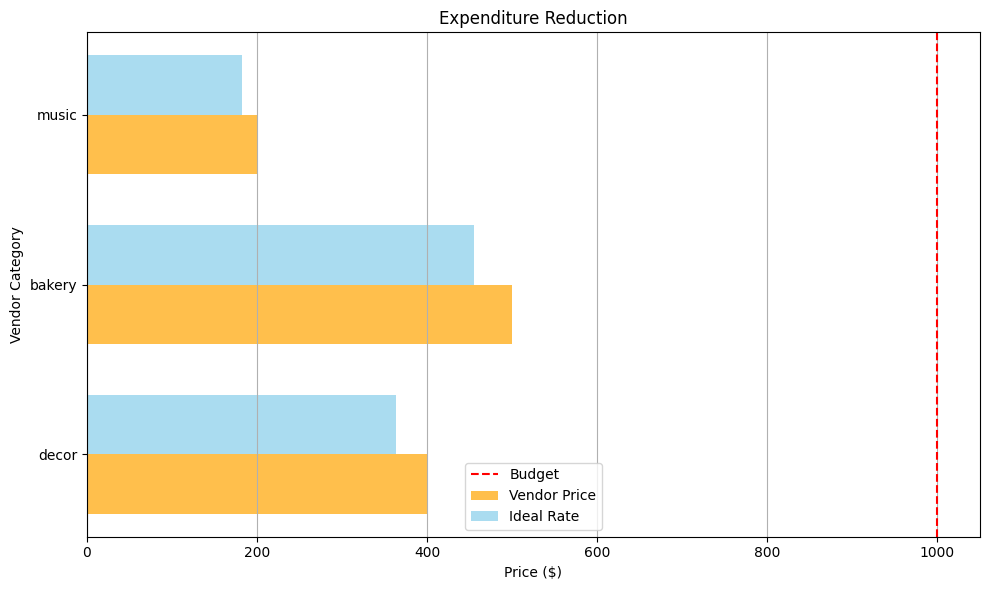


Breakdown of Expenses:
Initial Budget: $1000.00
Decor Vendor Price: $400.00
Bakery Vendor Price: $500.00
Music Vendor Price: $200.00
Total Price (Predicted): $1100.00
Ideal Decor Rate: $363.64
Ideal Bakery Rate: $454.55
Ideal Music Rate: $181.82


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

data = pd.read_csv('pricing_dataset.csv')

X = data[['Initial Price', 'Vendor Category', 'Vendor Price']]
y = data['Final Price']

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Vendor Category'])],
    remainder='passthrough'
)

model = RandomForestRegressor(random_state=42)

X_preprocessed = preprocessor.fit_transform(X)

model.fit(X_preprocessed, y)

# Function to predict total price and visualize expenditure reduction
def predict_and_visualize(initial_budget, vendor_details):
    predicted_total_price = sum(vendor_details.values())

    if predicted_total_price > initial_budget:
        # ideal rates to match the budget
        ideal_rates = {}
        for category, price in vendor_details.items():
            ideal_rate = price * (initial_budget / predicted_total_price)
            ideal_rates[category] = ideal_rate

        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        index = np.arange(len(vendor_details))
        opacity = 0.7

        plt.barh(index, list(vendor_details.values()), bar_width, alpha=opacity, color='orange', label='Vendor Price')

        plt.barh(index + bar_width, list(ideal_rates.values()), bar_width, alpha=opacity, color='skyblue', label='Ideal Rate')

        plt.axvline(x=initial_budget, color='red', linestyle='--', label='Budget')
        plt.xlabel('Price ($)')
        plt.ylabel('Vendor Category')
        plt.title('Expenditure Reduction')
        plt.yticks(index + bar_width / 2, list(vendor_details.keys()))
        plt.legend()
        plt.grid(axis='x')

        plt.tight_layout()
        plt.show()

    else:
        plt.figure(figsize=(10, 6))
        plt.barh(list(vendor_details.keys()), list(vendor_details.values()), color='orange', label='Vendor Price')
        plt.axvline(x=initial_budget, color='red', linestyle='--', label='Budget')
        plt.xlabel('Price ($)')
        plt.ylabel('Vendor Category')
        plt.title('Expenditure Reduction')
        plt.legend()
        plt.grid(axis='x')
        plt.show()

    print('\nBreakdown of Expenses:')
    print(f'Initial Budget: ${initial_budget:.2f}')
    for category, price in vendor_details.items():
        print(f'{category.capitalize()} Vendor Price: ${price:.2f}')
    print(f'Total Price (Predicted): ${predicted_total_price:.2f}')

    if predicted_total_price > initial_budget:
        for category, ideal_rate in ideal_rates.items():
            print(f'Ideal {category.capitalize()} Rate: ${ideal_rate:.2f}')

initial_budget = float(input("Enter your initial budget: "))
num_vendors = int(input("Enter the number of vendors: "))
vendor_details = {}
for i in range(num_vendors):
    category = input(f"Enter the vendor category {i+1} (decor, bakery, catering, music): ").lower()
    price = float(input(f"Enter the vendor price {i+1}: "))
    vendor_details[category] = vendor_details.get(category, 0) + price
predict_and_visualize(initial_budget, vendor_details)
